# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

1. Analyze and build an ML model to help identify which leads are more likely to convert to paid customers
2. Find the factors driving the lead conversion process
3. Create a profile of the leads which are likely to convert

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn.axisgrid import Grid

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
path = "/content/drive/MyDrive/Datasets/Elective_Project_Practice_Data_Science_Dataset.csv"
df= pd.read_csv(path)

NameError: ignored

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
#data has 4612 rows and 15 columns

df.shape

(4612, 15)

In [ ]:
#identify column data types and confirm non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
#Checks to see if there are any duplicate entries in the dataset

df.duplicated().sum()

0

In [ ]:
#renames print_media_type columns for easier reference

df.rename(columns={'print_media_type1': 'print_media_type_newspaper', 'print_media_type2': 'print_media_type_magazine'}, inplace = True)

In [ ]:
#Reviews high-level statistical summary of discrete/continuous numerical variables

df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


Insights:

1.   The average age of our potential and realized customers is 46.
2.   The average time spent on ExtraaLearn's website is 724 seconds (12 minutes).



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
#Produces the percentage ratio of each distinct value within each column for the columns defined in the variable list
category_column = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type_newspaper', 'print_media_type_magazine', 'digital_media', 'educational_channels', 'referral', 'status']

for column in category_column:
  print(df[column].value_counts(1))
  print("-"*50)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type_newspaper, dtype: float64
--------------------------------------------------
No     0.94948
Yes    0.05052
Name: print_media_type_magazine, dtype: float64
--------------------------------------------------
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
---------------------------------------------

**Insights:**

1. Professionals (57%) are the largest cohort within our dataset followed by unemployed individuals (31%). Professional workers are likely reviewing online educational services to refine their work skills and stay relevant while those that are unemployed are likely looking to upskill in order to gain employment. Students are the smallest group within our dataset suggesting online educational services may not be of as much interest to them.
2. Our potential and realized customers' first interactions came more from ExtraaLearn's website (55%) than mobile application (45%) with most activity centered around email (49%) followed by website usage (24%).
3. Only 10-15% of media and other advertisement channels reached our potential and realized customers, suggesting most individuals sought out the company through a raw search.
4. Nearly 30% of individuals who have interacted with us committed to being a customer.



In [ ]:
#Define function to analyze a boxplot and histogram simulataneously

def histogram_boxplot(data, feature, figsize=(12,7), kde=True, bins=None):
  figure, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=figsize)

  sns.boxplot(data=df, x = feature, ax=ax_box, showmeans = True)

  if bins == None:
    sns.histplot(data=df, x = feature, ax=ax_hist, kde=kde)
  else:
    sns.histplot(data=df, x = feature, ax=ax_hist, kde=kde, bins=bins)

  ax_hist.axvline(df[feature].mean(), color = 'green', linestyle='--')
  ax_hist.axvline(df[feature].median(), color = 'red', linestyle='-')

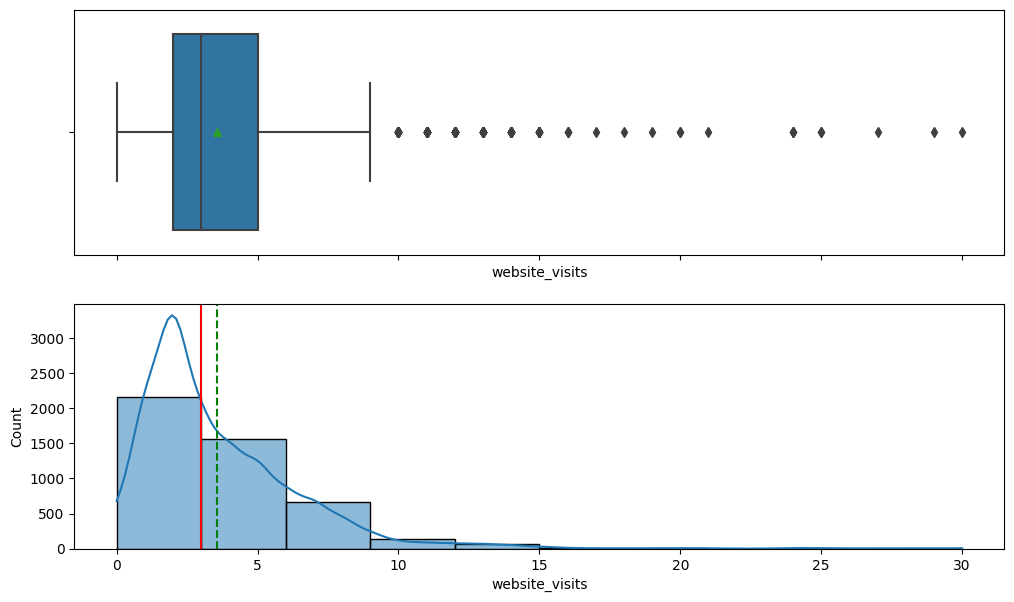

In [ ]:
histogram_boxplot(df, 'website_visits', bins = 10)

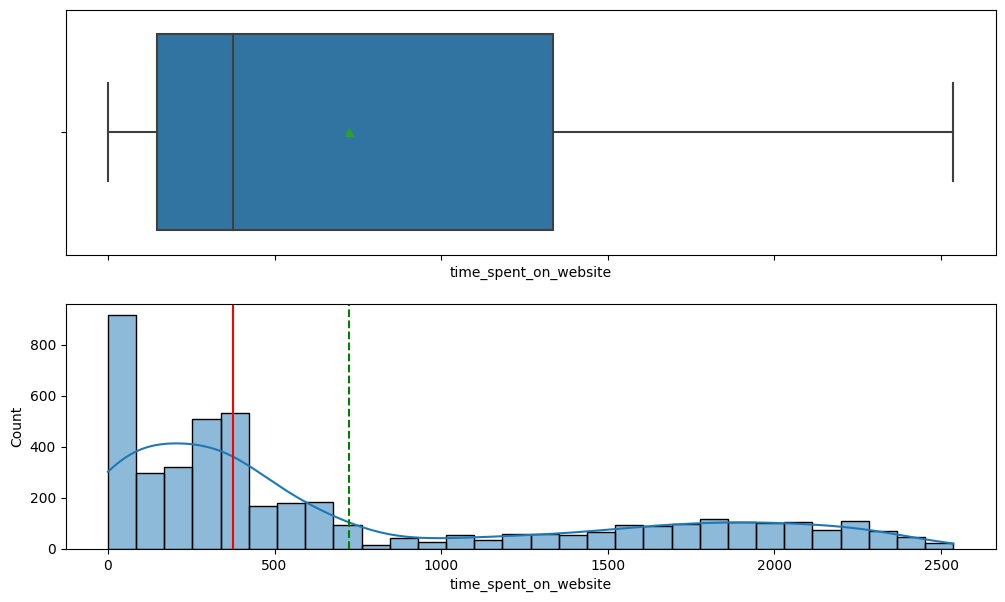

In [ ]:
histogram_boxplot(df, 'time_spent_on_website', bins = 30)

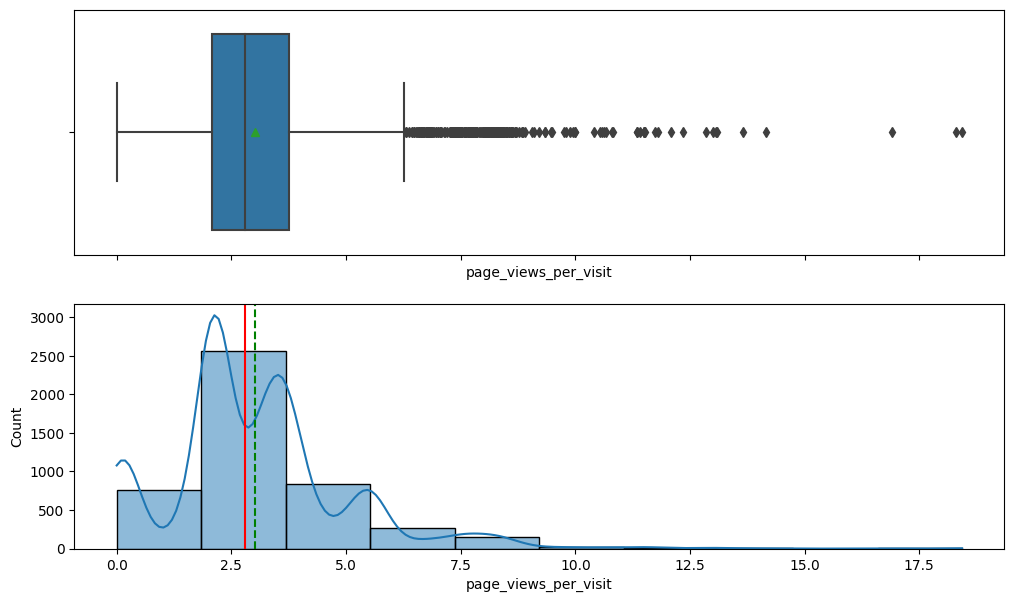

In [ ]:
histogram_boxplot(df, 'page_views_per_visit', bins = 10)

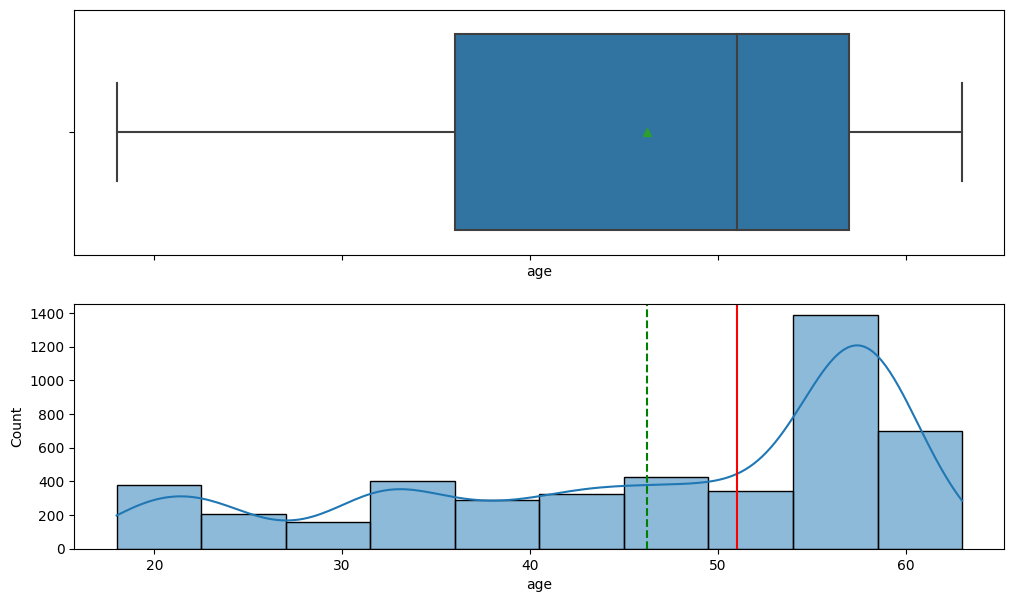

In [ ]:
histogram_boxplot(df, 'age', bins = 10)

Insights:

1. There is a significant right-tail skew for time spent on website and the data reflects almost two distributions, one for less than 750 seconds (12.5 minutes) and another between 1500-2500 seconds (25-42 minutes).
2. There is a significant left-tail skew for age with a large concentration of individuals between 55-60 years old.


1    0.50578
0    0.49422
Name: status, dtype: float64
--------------------------------------------------
0    0.761612
1    0.238388
Name: status, dtype: float64


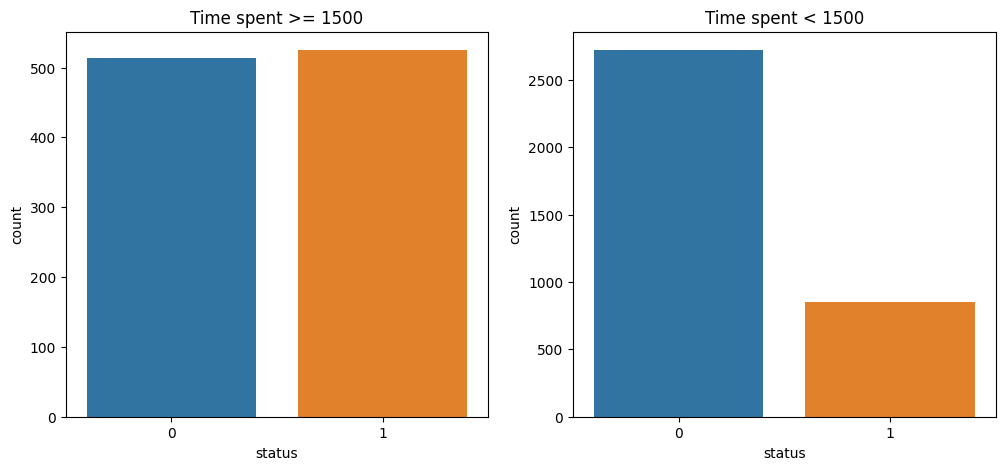

In [ ]:
#Individuals who spend more time on the site are more likely to become a customer (50.6% relative to 23.8%) with the threshold at 1500 seconds (25 minutes)

filtered_df1 = df[df['time_spent_on_website']>=1500]
filtered_df2 = df[df['time_spent_on_website']<1500]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=filtered_df1, x='status', ax=axs[0])
axs[0].set_title('Time spent >= 1500')
sns.countplot(data=filtered_df2, x='status', ax=axs[1])
axs[1].set_title('Time spent < 1500')

print(filtered_df1['status'].value_counts(1))
print("-"*50)
print(filtered_df2['status'].value_counts(1))


In [ ]:
#Creating a new dataframe attribute called age_bucket to group the age values and a variable list to sort the groups for further analysis

age_bucket=[]

for value in df['age']:
  if value < 20:
    age_bucket.append("Age less than 20")
  elif 20 <= value < 30:
    age_bucket.append("Age between 20 and 30")
  elif 30 <= value < 40:
    age_bucket.append("Age between 30 and 40")
  elif 40 <= value < 50:
    age_bucket.append("Age between 40 and 50")
  elif 50 <= value < 60:
    age_bucket.append("Age between 50 and 60")
  elif value >= 60:
    age_bucket.append("Age greater than 60")
  else:
    age_bucket.append(None)

df['age_bucket'] = age_bucket

age_bucket_order = [
    "Age less than 20",
    "Age between 20 and 30",
    "Age between 30 and 40",
    "Age between 40 and 50",
    "Age between 50 and 60",
    "Age greater than 60"
]


current_occupation  age_bucket           
Professional        Age between 50 and 60    0.547018
                    Age between 40 and 50    0.199541
                    Age between 30 and 40    0.160550
                    Age greater than 60      0.051606
                    Age between 20 and 30    0.041284
Student             Age between 20 and 30    0.735135
                    Age less than 20         0.264865
Unemployed          Age between 50 and 60    0.432339
                    Age between 30 and 40    0.204025
                    Age between 40 and 50    0.199861
                    Age greater than 60      0.163775
Name: age_bucket, dtype: float64

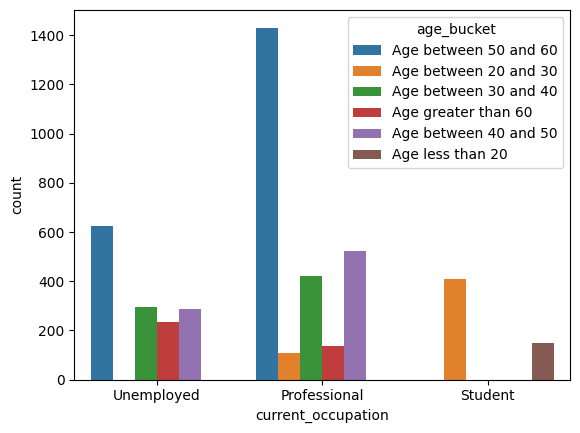

In [ ]:
#As expected, students are the youngest of all the groups.

sns.countplot(data=df,x='current_occupation', hue='age_bucket')
df.groupby('current_occupation')['age_bucket'].value_counts(normalize=True)

current_occupation  status
Professional        0         0.644878
                    1         0.355122
Student             0         0.882883
                    1         0.117117
Unemployed          0         0.734212
                    1         0.265788
Name: status, dtype: float64

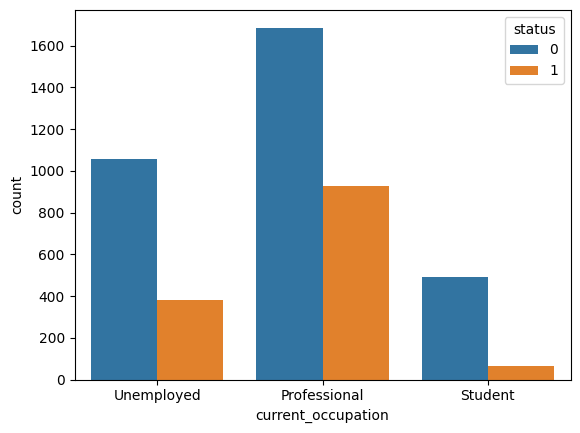

In [ ]:
#Students are the least expected to convert to a potential customer

sns.countplot(data=df,x='current_occupation', hue='status')
df.groupby('current_occupation')['status'].value_counts(normalize=True)

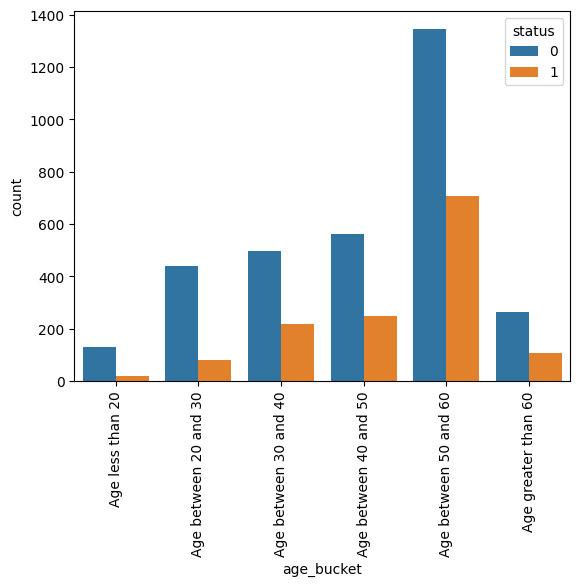

In [ ]:
# Age is tied to conversions with the exception of individuals older than 60.

sns.countplot(data=df, x='age_bucket', hue='status', order = age_bucket_order)
plt.xticks(rotation=90);

<Axes: xlabel='first_interaction', ylabel='count'>

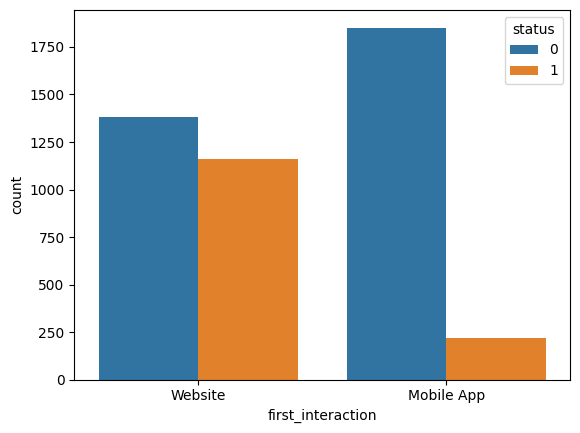

In [ ]:
#Most conversions are not from the mobile app but instead via the website.

sns.countplot(data=df, x='first_interaction', hue='status')

last_activity     status
Email Activity    0         0.696664
                  1         0.303336
Phone Activity    0         0.786872
                  1         0.213128
Website Activity  0         0.615455
                  1         0.384545
Name: status, dtype: float64

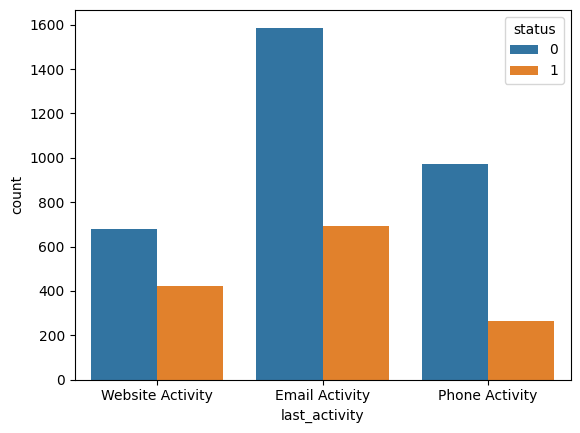

In [ ]:
sns.countplot(data=df,x='last_activity', hue='status')
df.groupby('last_activity')['status'].value_counts(normalize=True)

profile_completed  status
High               0         0.582155
                   1         0.417845
Low                0         0.925234
                   1         0.074766
Medium             0         0.811245
                   1         0.188755
Name: status, dtype: float64

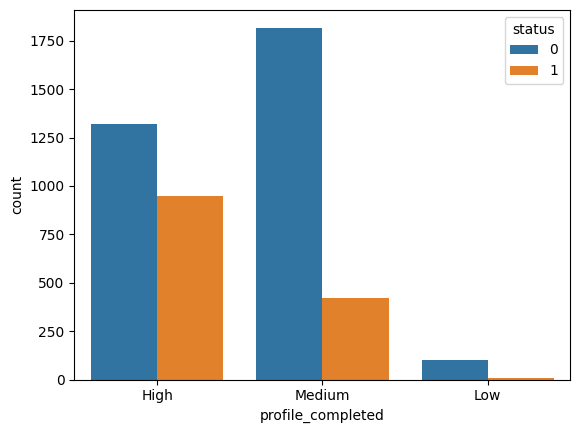

In [ ]:
# Profiles that have a higher completion status are also more likely to be converted

sns.countplot(data=df,x='profile_completed', hue='status')
df.groupby('profile_completed')['status'].value_counts(normalize=True)

print_media_type_newspaper  status
No                          0         0.70401
                            1         0.29599
Yes                         0         0.68008
                            1         0.31992
Name: status, dtype: float64

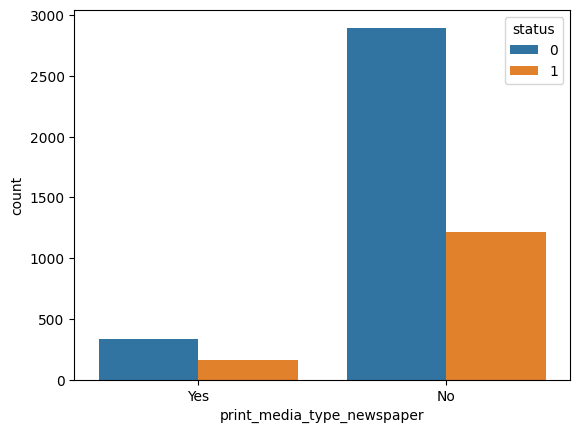

In [ ]:
sns.countplot(data=df, x='print_media_type_newspaper', hue='status')
df.groupby('print_media_type_newspaper')['status'].value_counts(normalize=True)

print_media_type_magazine  status
No                         0         0.702672
                           1         0.297328
Yes                        0         0.678112
                           1         0.321888
Name: status, dtype: float64

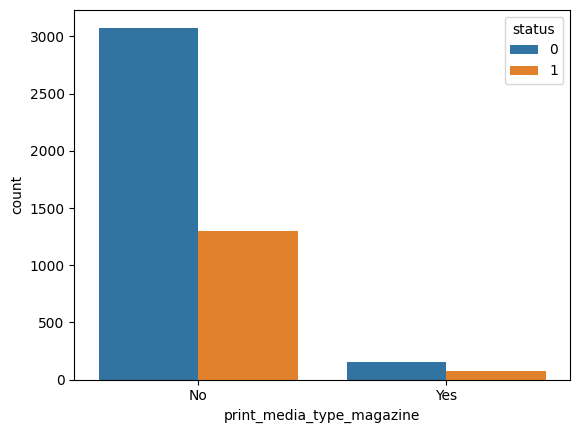

In [ ]:
sns.countplot(data=df, x='print_media_type_magazine', hue='status')
df.groupby('print_media_type_magazine')['status'].value_counts(normalize=True)

educational_channels  status
No                    0         0.697978
                      1         0.302022
Yes                   0         0.720567
                      1         0.279433
Name: status, dtype: float64

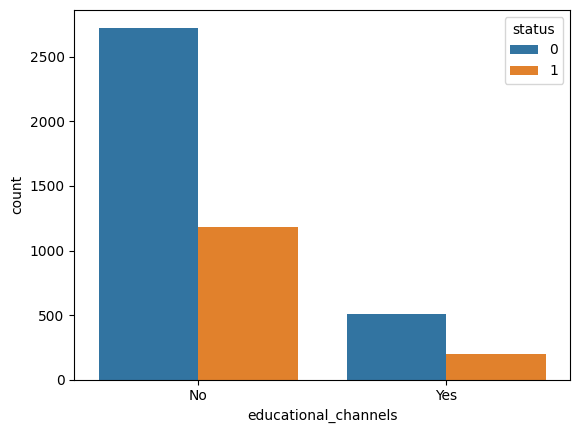

In [ ]:
sns.countplot(data=df, x='educational_channels', hue='status')
df.groupby('educational_channels')['status'].value_counts(normalize=True)

digital_media  status
No             0         0.704039
               1         0.295961
Yes            0         0.681214
               1         0.318786
Name: status, dtype: float64

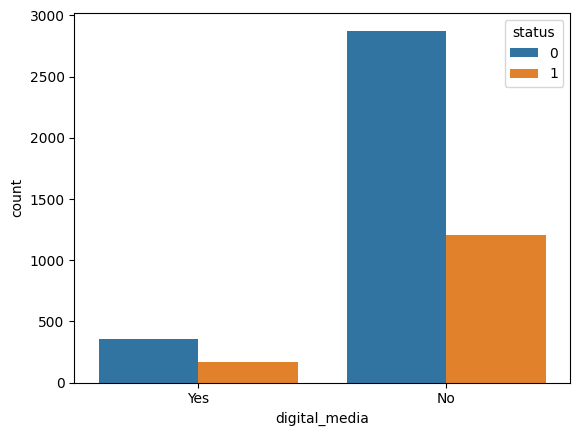

In [ ]:
sns.countplot(data=df, x='digital_media', hue='status')
df.groupby('digital_media')['status'].value_counts(normalize=True)

referral  status
No        0         0.709228
          1         0.290772
Yes       1         0.677419
          0         0.322581
Name: status, dtype: float64

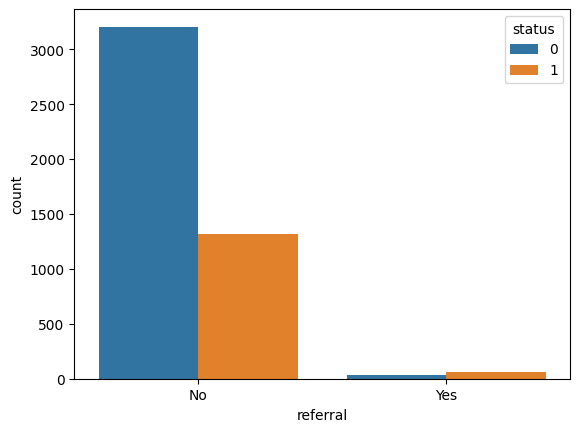

In [ ]:
# There is a 68% chance of converting a potential customer if they have received a referral

sns.countplot(data=df, x='referral', hue='status')
df.groupby('referral')['status'].value_counts(normalize=True)

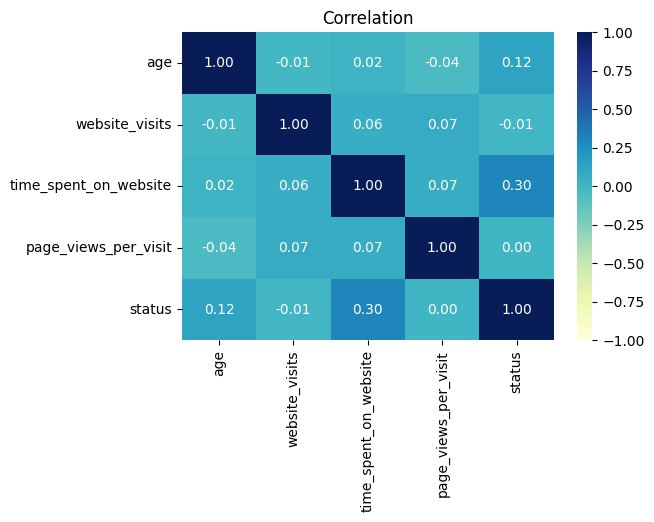

In [ ]:
# Time spent on website has the highest correlation to status followed by age.

correlation = df.corr(numeric_only=True)
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap = 'YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation')
plt.show()


**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

> **Students are the group least willing to be converted. One reason could be that they are already inundated with their normal coursework and see no value in signing up for additional online learning or do not have the bandwidth. On the opposite end of the spectrum are professionals who have the highest conversion and are likely utilizing online learning as a means to stay relevant and help assist them in their job responsibilities.**

2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

> **Yes. Depending on the interaction channel, the company can generate more or less leads indicating there is a possibility to enhance the user experience for some channels to drive more conversions or that the base customer simply prefers utilizing a particular channel and more time/investment should be dedicated to capturing our target audience.**

3. The company uses multiple modes to interact with prospects. Which way of interaction works best?

> **Interacting directly through the company's website is the strongest channel to convert potential customers. The mobile platform ranks last in terms of usage and customer conversion.**

4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

> **In terms of nominal volume, the education channel (27.9%) produces more conversions but from a rate standpoint, the magazine channel actually drives a 32.2% conversion rate.**

5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

> **Yes it does. Profiles with the most detail provided yields a conversion rate of 41.8%. This decreases to 18.9% for profiles that have some but not an extensive amount of information.**

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



1. There were no missing values
2. One-hot encoding will need to be performed prior to modeling. Previous changes made include adding a new field bucketing 'age' into groups and renaming two attributes.
3. Outliers were detected but no treatment was needed/performed.
4. Dropping 'ID' from the dataset as that is not needed.


In [ ]:
df.drop(columns=['ID'], inplace=True)

In [ ]:
# Creating a list of only object/category columns to feed into pandas get dummies function for one-hot encoding.

df.select_dtypes(include = ['object', 'category']).columns.tolist()

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type_newspaper',
 'print_media_type_magazine',
 'digital_media',
 'educational_channels',
 'referral',
 'age_bucket']

In [ ]:
# Generating 1s and 0s (one-hot encoding) for our object/category column values.

df = pd.get_dummies(
    df,
    columns = df.select_dtypes(include = ['object', 'category']).columns.tolist(),
    drop_first=True
)

In [ ]:
# Assigning x and y values for  our test/train data split

x = df.drop('status', axis = 1)
y = df['status']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, shuffle=True, random_state=1)

## Building a Decision Tree model

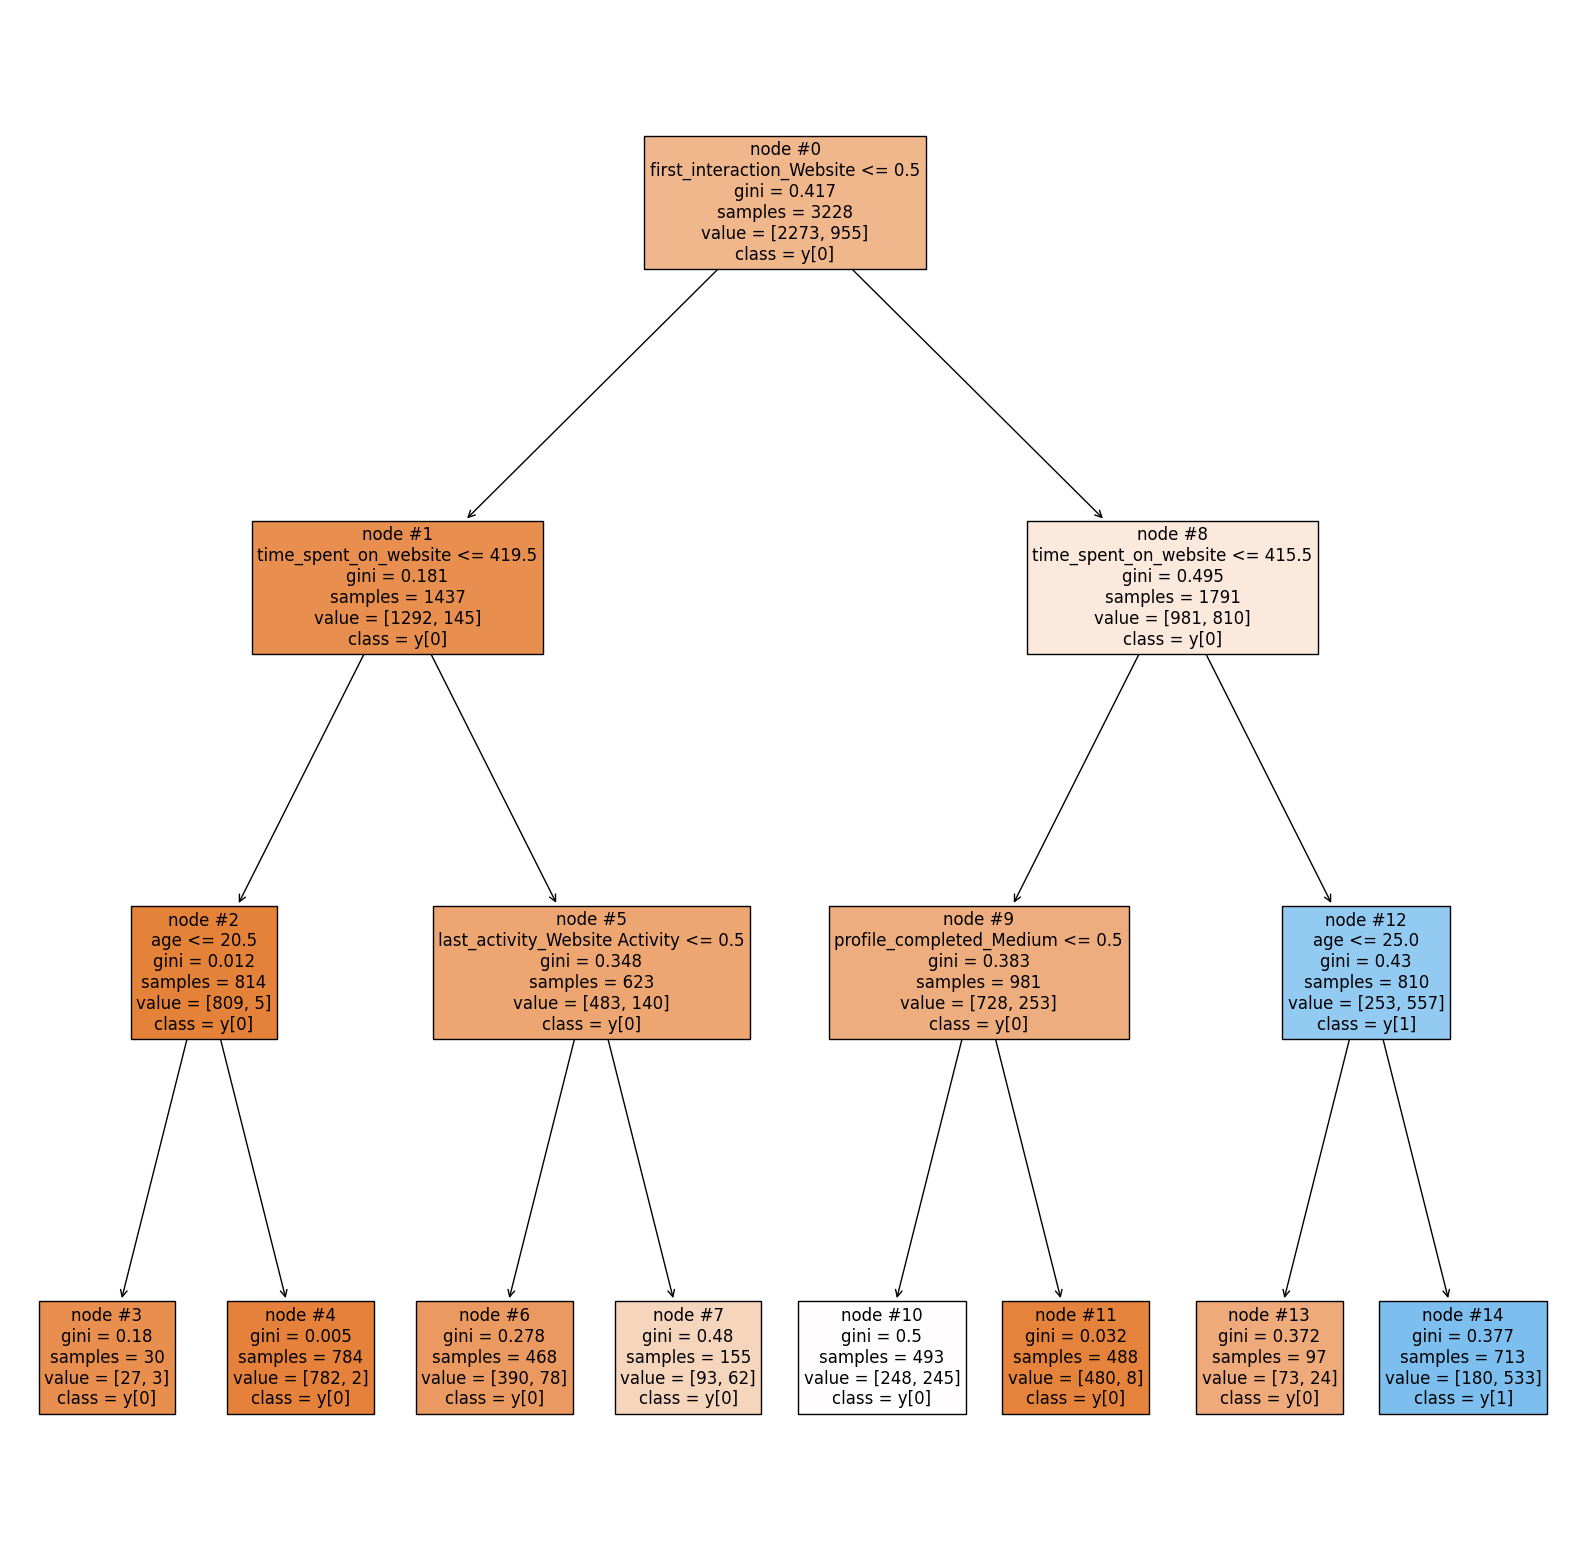

In [ ]:
#Assigning the features variable to the list of columns used as input to the model which will be used to pass an argument into the tree classifier visual diagram
features = list(x.columns)

#Fits the visualizer with the dataset
dt_classifier_visualize = DecisionTreeClassifier(random_state = 1, max_depth = 3)
dt_classifier_visualize.fit(x_train, y_train)

#Graphs the visualizer to a tree diagram which visually describes the thought process of how it classifies whether a potential customer will be converted
plt.figure(figsize=(20,20))
tree.plot_tree(dt_classifier_visualize, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True);

In [ ]:
#Alternative way of viewing the above tree diagram

print(tree.export_text(dt_classifier_visualize, feature_names = features, show_weights = True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- age <= 20.50
|   |   |   |--- weights: [27.00, 3.00] class: 0
|   |   |--- age >  20.50
|   |   |   |--- weights: [782.00, 2.00] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |--- weights: [390.00, 78.00] class: 0
|   |   |--- last_activity_Website Activity >  0.50
|   |   |   |--- weights: [93.00, 62.00] class: 0
|--- first_interaction_Website >  0.50
|   |--- time_spent_on_website <= 415.50
|   |   |--- profile_completed_Medium <= 0.50
|   |   |   |--- weights: [248.00, 245.00] class: 0
|   |   |--- profile_completed_Medium >  0.50
|   |   |   |--- weights: [480.00, 8.00] class: 0
|   |--- time_spent_on_website >  415.50
|   |   |--- age <= 25.00
|   |   |   |--- weights: [73.00, 24.00] class: 0
|   |   |--- age >  25.00
|   |   |   |--- weights: [180.00, 533.00] class: 1



In [ ]:
# Fitting the training data to our Decision Tree Classifier model

dt_classifier = DecisionTreeClassifier(random_state = 1)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

## Model Performance evaluation and improvement

In [ ]:
# Creating a confusion matrix score to identify model performance

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['No Conversion', 'Conversion'], yticklabels = ['No Conversion', 'Conversion'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



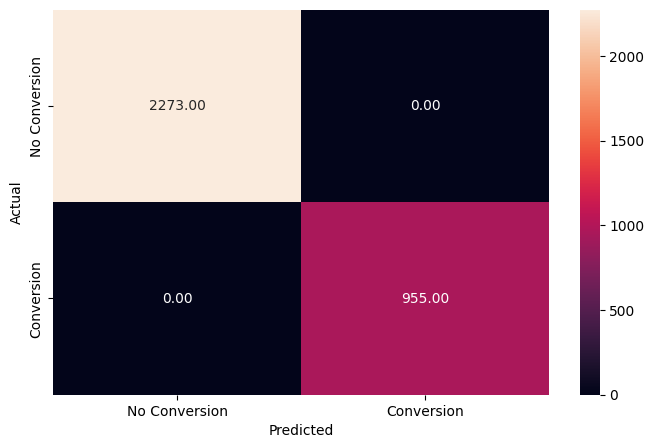

In [ ]:
# Outputting the results of our Decision Tree Classifier model using training dataset
# The results could definitely be overfitting on the training dataset given 100% precision and recall

dt_classifier_pred = dt_classifier.predict(x_train)
metrics_score(y_train, dt_classifier_pred)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.71      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



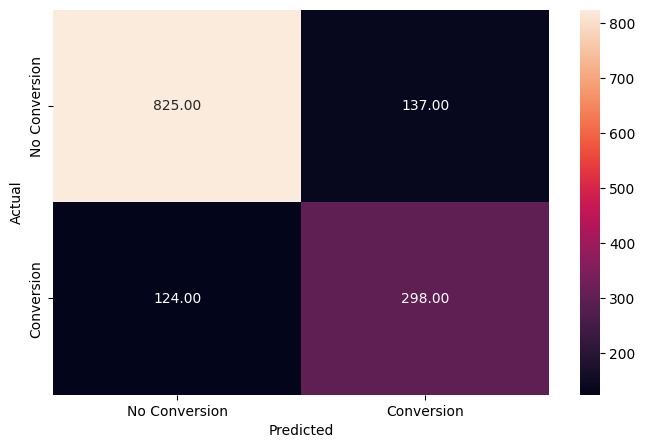

In [ ]:
# Outputting the results of our Decision Tree Classifier model using test dataset
# The results aren't too bad. The weighted average precision, recall, and f1 score is 81%

dt_classifier_pred = dt_classifier.predict(x_test)
metrics_score(y_test, dt_classifier_pred)

Insights:



*   Using the Decision Tree Classifier on test data, we evaluate a weighted f1  item score of 0.81 which is pretty good. However, it's important to point out that the model is only really 69% accurate (precision - 1) in terms of classifying whether a potential customer will convert. Given that we are trying to build a model that values accurately predicting conversions, precision will carry more weight.





In [ ]:
# Attempting a different model to see if it will perform better
# Fitting the Bagging Classifier model to the training dataset

bagging_classifier = BaggingClassifier(random_state = 1)
bagging_classifier.fit(x_train, y_train)

BaggingClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       962
           1       0.79      0.65      0.71       422

    accuracy                           0.84      1384
   macro avg       0.82      0.79      0.80      1384
weighted avg       0.84      0.84      0.84      1384



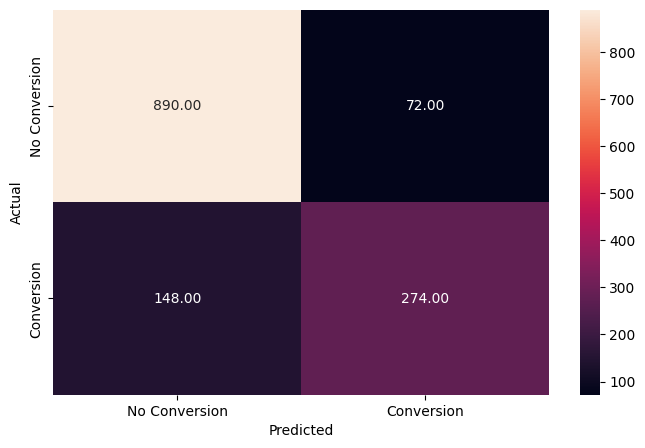

In [ ]:
# Outputting the results of our Bagging Classifier model using test dataset
# There is a significant improvement over the Decision Tree classifier

bagging_classifier_pred = bagging_classifier.predict(x_test)
metrics_score(y_test, bagging_classifier_pred)

Insights:

* The Bagging Classifier model shows a significant improvement over the Decision Tree model. While the f1 score increased by 0.03 to 0.84, the precision for customers that actually convert increased by 10% to 0.79.


## Building a Random Forest model

In [ ]:
# Fitting the Random Forest Classifier model to the training dataset

rf_classifier = RandomForestClassifier(random_state = 1)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.82      0.70      0.76       422

    accuracy                           0.86      1384
   macro avg       0.85      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



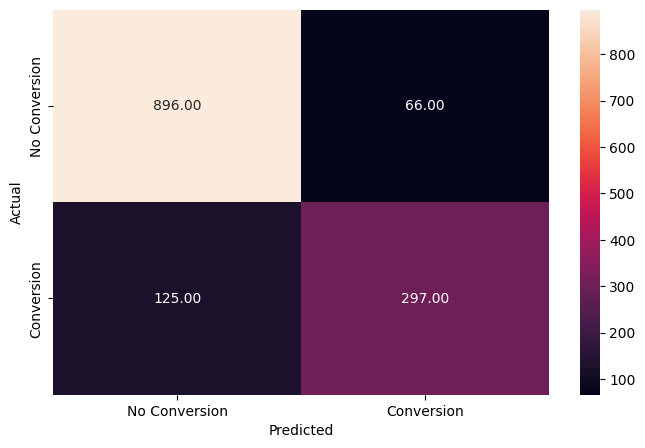

In [ ]:
# Outputting the results of our Random Forest Classifier model using test dataset
# There is a slight improvement over the Decision Tree classifier/Bagging Classifier

rf_classifier_pred = rf_classifier.predict(x_test)
metrics_score(y_test, rf_classifier_pred)

## Model Performance evaluation and improvement

In [ ]:
#Providing various hyperparameter scenarios for the Random Forest model

rf_tuned = RandomForestClassifier(random_state = 1)
rf_parameters = {
    'n_estimators': [100, 110, 120, 130],
    'max_depth': [None, 5, 7, 10],
    'max_features': [0.8, 0.9, 1.]
}

In [ ]:
#Using GridSearchCV to identify the best hyperparameter combo

rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = 'neg_mean_squared_error', cv=7)
rf_grid_obj.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 5, 7, 10],
                         'max_features': [0.8, 0.9, 1.0],
                         'n_estimators': [100, 110, 120, 130]},
             scoring='neg_mean_squared_error')

In [ ]:
#Fitting the Random Forest model with the best hyperparameter combo to the training dataset

rf_tuned_classifier = rf_grid_obj.best_estimator_
rf_tuned_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features=0.9, random_state=1)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.82      0.71      0.76       422

    accuracy                           0.86      1384
   macro avg       0.85      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



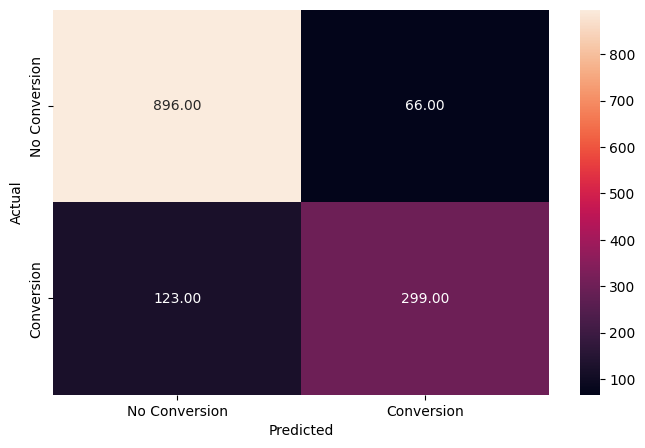

In [ ]:
# Outputting the results of our tuned Random Forest Classifier model using test dataset

rf_tuned_classifier_pred = rf_tuned_classifier.predict(x_test)
metrics_score(y_test, rf_tuned_classifier_pred)

Insights:

The original Random Forest model shows a slight improvement over the Bagging Classifier model with a weighted average f1 score of 0.86 and a precision - 1 score of 0.82. After attempting to fine-tune the Random Forest model, the precision score stayed the same with only a slight increase in accuracy for no conversions.


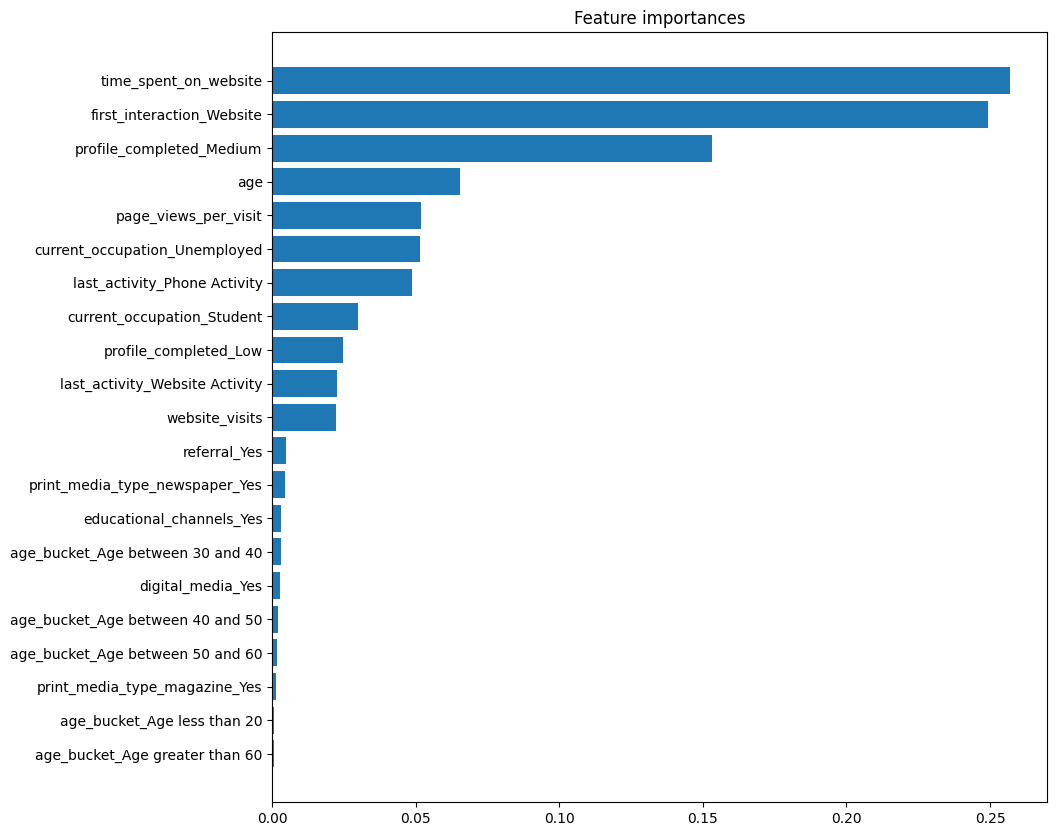

In [ ]:
#Identifying the most important features to classify whether a potential customer will convert or not with our tuned Random Forest model

importances = rf_tuned_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10,10))
plt.title('Feature importances')
plt.barh(range(len(features)), importances[indices], align='center')
plt.yticks(range(len(features)), [features[i] for i in indices]);

Insights:

Based on our EDA, we already recognized 3 of the 5 top features that we thought were important in classifying customer conversion: first interaction channel, profile completion, and age. The other 2 important features the Random Forest model utilizes is the time spent on website or being unemployed.  

In [ ]:
# Attempting other ensemble models to evaluate performance against our refined Random Forest model
# Fitting the Gradient Boosting Classifier model to the training dataset

grad_classifier = GradientBoostingClassifier (random_state = 1)
grad_classifier.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       962
           1       0.79      0.73      0.76       422

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.85      0.86      0.86      1384



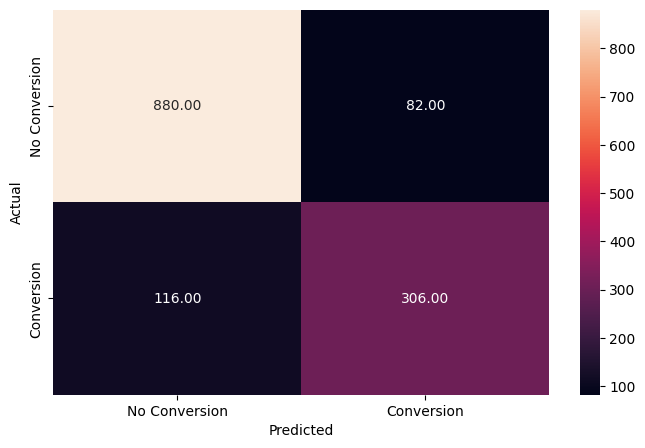

In [ ]:
# Outputting the results of our Gradient Boosting Classifier model using test dataset
# This model outperforms Decision Tree and Bagging, but not Random Forest

grad_classifier_pred = grad_classifier.predict(x_test)
metrics_score(y_test, grad_classifier_pred)

In [ ]:
# Fitting the Xtreme Gradient Boosting Classifier model to the training dataset

xgb_classifier = XGBClassifier(random_state = 1)
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       962
           1       0.77      0.72      0.74       422

    accuracy                           0.85      1384
   macro avg       0.82      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



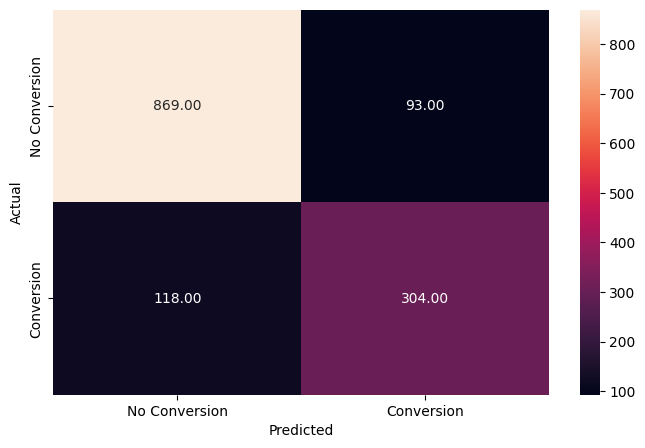

In [ ]:
# Outputting the results of our XTreme Gradient Boosting Classifier model using test dataset
# This model actually slightly underperforms the normal Gradient Boosting Classifier model

xgb_classifier_pred = xgb_classifier.predict(x_test)
metrics_score(y_test, xgb_classifier_pred)

## Actionable Insights and Recommendations

Overall Insights:

* Based on our model, the top 3 contributing factors to identifying whether a person will convert to a customer depends on their time spent on the website, their age, and their profile completion level.

>* The longer a person spends their time on ExtraaLearn's site, the more likely they are to convert to a customer.
>* The older a person is, the more likely they will be a customer. This is due to individuals younger than 30 likely being students which are a small subset of ExtraaLearn's customer base.
>* The more information a person provides to their profile, the more likely they are to becoming a customer.

* Our model will correctly predict up to 82% accuracy on whether a customer is converting.
* Print, media, and educational channels do not offer that much value in terms of converting customers.


---



Recommendations:


* ExtraaLearn should focus on targeting working professionals/unemployed individuals that are 30 years and older to increase their customer base.
* ExtraaLearn should reduce advertising spending on print, media, and other channels because they are not effective.
* ExtraaLearn should enhance their website to increase the duration that individuals spend on their site.



---



Target Customer Base:

* Professionals / Unemployed Occupation
* 30 years old +
* Individuals who prefer web usage over mobile apps




